# Modeling the visibility of clear fishing lines

## TLDR:
* For fun, I use physics + math to model the visibility of fishing lines in clear, fresh water, to compare the visibility of fluorocarbon and nylon (monofilament) lines of the same diameter.
* Results: according to the math models, clear fluorocarbon line is **not invisible** underwater, and it is **about as visible** as clear nylon line of the same diameter when submerged in clear fresh water. Even though the index of refraction of fluorocarbon is closer to the index of refraction of water than is nylon's, fluorocarbon would need an index of refraction that is far closer to that of water's before it became invisible.

## Introduction

* Fishing line companies market fluorocarbon lines as drastically less visible underwater than cheaper nylon (monofilament) lines -- sometimes even stating that fluorocarbon is "invisible" underwater. This is listed as a major selling point for fluorocarbon, which is often 3x the price of equivalent nylon line.
* However, skeptics claim there is no practical difference in underwater visibility. Jeff Thomson even used mathematical modeling to substantiate that point. (See [Mathematical Theory of Fishing Line Visibility](https://www.slideserve.com/lesley/mathematical-theory-of-fishing-line-visibility).)
* In general, there seems to be a big debate in the fishing community, with underwater visibility tests claiming to support or refute the claim.
* Hence, I perform my own mathematical modeling, similar to Thomson's but independent, to essentially reproduce the work and see what conclusions I draw.

### Experiments
As a complement to modeling, and to better explain the issue under investigation, I submerged fluorocarbon and nylon lines of similar diameters in fresh water.  As shown in the image below:
1. Fluorocarbon is definitely NOT invisible.
2. I don't see a drastic difference in the visibility of the lines.  That will be the conclusion drawn from modeling as well.


<img src="images/lines.jpg" alt="submerged fishing lines" width="300"/>

In contrast, to see what actual invisibility looks like, here is a screenshot
from a [YouTube video](https://www.youtube.com/watch?v=9Tj2KMZhfoc) that shows pyrex test tubes submerged in water (left)
and partially submerged in corn oil (right).  The pyrex tube in water is visible, while the tube in
corn oil is invisible.  The reason is that corn oil and pyrex have the same index of refraction, 1.47, while pyrex and water (1.333) do not.

<img src="images/tubes.png" alt="submerged test tubes" width="400"/>

Evidently, fluorocarbon (1.42) in water (1.333) is a lot like pyrex (1.47) in water: visible!  It is not invisible like
pyrex in corn oil -- the difference in indices of refraction of water and fluorocarbon are too great for invisibility.


## Math modeling approach

I model fishing line as a long (infinite) cylinder with radius $R$. I assume the line is transparent with index of refraction $m_t$.
The line is submerged in clear fresh water with index of refraction $m$.  

When light rays hit the cylinder, some rays are transmitted through the cylinder unaffected, while
other rays are deflected at an angle (scattered), or possibly even absorbed. The
setup is illustrated below.

<img src="images/diagram.png" alt="Light scattering diagram" width="400"/>

A relatively simple way to quantify how much the fishing line disturbs incident light
is to compute the "extinction efficiency" $Q_{e}$ of the cylinder. This is a normalized
measure of how much light energy gets scattered or absorbed. If the extinction
efficiency goes to zero, no light is scattered or absorbed, so incident light passes through the object unaffected.  Hence, I use extinction efficiency as a quantitative measure of visibility.  Note that in general, extinction efficiency is a sum of effects from scattering and aborption, represented mathematically as
$$Q_{e} = Q_{s} + Q_{a}$$

#### Limitations
Different indices of refraction will change the angular distribution of light rays, which might affect visibility. The simple approach adopted here, computing extinction coefficients, does not investigate those fine details.  However, it seems a reasonable starting point for an analysis.

## Modeling details

I model the effect of the different indices of refraction of fluorocarbon vs nylon in lines with **the same radius**.  I do so at because it is claimed fluorocarbon is "invisible" under water because its index of refraction is more similar to water's than is nylon's.   

I assume the indices of refraction are:
* fresh water: 1.333
* fluorocarbon: 1.42
* nylon: 1.53 - 1.62  
(Values from [Seaguar](https://www.seaguar.ne.jp/en/about.html).)

I compute results for light at 550 nanometers (green light), which is the middle of the visible spectrum.

Formulas for the scattering of light from an infinite dieletric (i.e. non-conductiong) cylinder, which should be a good model for fishing line, come from this paper:
* *Light scattering by an infinite circular cylinder immersed in an absorbing medium*, Sun, 2005, [link](https://web.archive.org/web/20111026055709id_/http://earth-www.larc.nasa.gov/~fan/Publications/sca_abs_cyinder_AppOptics.pdf).

Below I give some quick math details to point out which formulas in the paper I use:

In the paper, extiction and scattering efficiencies are given by
$$
  Q_e = W_e / f  
$$

$$
  Q_s = W_s / f
$$

I model water and fishing line as non-absorbing. Technically, this means the index of refraction is purely real, and has no imaginary (absorbing) component. That seems a reasonable approximation for clear water and transparent lines over short distances, since absorption is usually small. It's also necessary since I have no info about absorption properties of nylon or fluorcarbon.  Hence, in the formulas from the paper, I set the imaginary component of the indices of refraction to zero:
$$m = m_r + i m_i = m_r$$

As a result, formula 8 simplfies to
$$
  f = 2aI_0
$$

Because absorption is assumed zero, scattering and extinction efficiencies should be identical, even though different formulas are used to compute them. I use this as a consistency check to make sure my implementation is correct.
$$Q_e = Q_s$$

Scattering and extinction efficiencies for parallel polarized light are given by formulas **4a** and **4b** from the paper, which I'll denote
$$Q_{s, parallel}$$
$$Q_{e, parallel}$$

While those for perpendicularly polarized light are given by formulas **7a** and **7b**
$$Q_{s, perpendicular}$$
$$Q_{e, perpendicular}$$

I'll average them, which is equivalent to assuming the light is unpolarized
$$Q_{s, unpolarized} = 1/2(Q_{s, parallel} + Q_{s, perpendicular})$$
$$Q_{e, unpolarized} = 1/2(Q_{e, parallel} + Q_{e, perpendicular})$$

The formulas (4 and 7) take the form of infinite series. Those can be approximated
by a finite number of terms. Hence, I'll examine how many terms are needed before
the series converge.

## Oscillations

One complication we'll deal with later in this notebook is that the results oscillate rapidly as
the index of refraction changes by tiny amounts.  This seems to be a genuine result of
the math model -- I believe it occurs because light reflects inside the fishing line and can constructively or destructively interfere with itself; minuscule changes in the index of refraction change change the interference from constructive to destructive.  However, I think this effect only occurs in the model  due to the somewhat simplistic model assumptions of perfectly coherent monochromatic light.
I believe the oscillations would average out and not be visible in the real world with white light with a short
coherence length. Hence, later in the notebook, I average out the high-frequency oscillations and re-check the results with those removed.




In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.special import jv, jvp, hankel2, h2vp, hankel1, h1vp
from tqdm.notebook import tqdm

In [2]:
WAVELENGTH_M = 550E-9 #center of visible spectrum

#indices of refraction taken from https://www.seaguar.ne.jp/en/about.html
N_WATER = 1.333
N_FLUORO = 1.42
N_NYLON_MAX = 1.63
N_NYLON_MIN = 1.53
N_NYLON = N_NYLON_MIN

#Typical diameters for fishing lines, e.g. 8lb line has diameter .28 mm.
LINE_STRENGTH_LBS_TO_DIAMETER_MM = {6: 0.25 , 8: .28, 15: .38, 25: .48}


In [3]:
def compute_line_radius_m(line_strength_lbs):
  diam_mm = LINE_STRENGTH_LBS_TO_DIAMETER_MM[line_strength_lbs]
  radius_m = (diam_mm / 2.0) / 1000.0
  return radius_m
  
def compute_x(line_radius_m, wavelength_m):
  x = 2*np.pi*line_radius_m/ wavelength_m
  return x

#---------------------------------------------------
#parallel polarization 

def compute_bn(n, m, mt, x):
  #eq 3
  num = m*jv(n, mt*x)*jvp(n, m*x) - mt*jvp(n, mt*x)*jv(n, m*x)
  denom = m*jv(n, mt*x)*h1vp(n, m*x) - mt*jvp(n, mt*x)*hankel1(n, m*x)
  return num/denom

def compute_extinction_efficiency_par(m, mt, x, num_terms):
  #eq 4b
  sum = jv(0, m*x)*np.conjugate(jvp(0, m*x))

  b0 = compute_bn(0, m, mt, x)
  sum += - np.conjugate(b0)*jv(0, m*x)*np.conjugate(h1vp(0, m*x)) - b0*np.conjugate(jvp(0, m*x))*hankel1(0, m*x)

  for n in range(1, num_terms+1):
    bn = compute_bn(n, m, mt, x)
    sum += 2*( jv(n, m*x)*np.conjugate(jvp(n, m*x)) - np.conjugate(bn)*jv(n, m*x)*np.conjugate(h1vp(n, m*x)) 
               - bn*np.conjugate(jvp(n, m*x))*hankel1(n, m*x))

  return np.pi * np.imag(sum)

def compute_scattering_efficiency_par(m, mt, x, num_terms):
  #eq 4a
  b0 = compute_bn(0, m, mt, x)
  sum = b0*np.conjugate(b0)*hankel1(0,m*x)*np.conjugate(h1vp(0, m*x))
  
  for n in range(1, num_terms+1):
    bn = compute_bn(n, m, mt, x)
    sum += 2*bn*np.conjugate(bn)*hankel1(n,m*x)*np.conjugate(h1vp(n, m*x))
  return -np.pi * np.imag(sum)

#----------------------------------------------------------
#perpendicular polarization

def compute_an(n, m, mt, x):
  #eq 6
  num = mt*jv(n, mt*x)*jvp(n, m*x) - m*jvp(n, mt*x)*jv(n, m*x)
  denom = mt*jv(n, mt*x)*h1vp(n, m*x) - m*jvp(n, mt*x)*hankel1(n, m*x)
  return num/denom

def compute_extinction_efficiency_perp(m, mt, x, num_terms):
  #eq 7b
  a0 = compute_an(0, m, mt, x)
  sum = jvp(0,m*x)*np.conjugate(jv(0, m*x))  \
       - np.conjugate(a0)*jvp(0, m*x)*np.conjugate(hankel1(0, m*x)) \
       - a0 * np.conjugate(jv(0, m*x))*h1vp(0, m*x)
  
  for n in range(1, num_terms+1):
    an = compute_an(n, m, mt, x)
    sum += 2*( jvp(n, m*x)*np.conjugate(jv(n,m*x)) \
               - np.conjugate(an)*jvp(n, m*x)*np.conjugate(hankel1(n, m*x)) \
               - an*np.conjugate(jv(n, m*x))*h1vp(n, m*x) )

  return -np.pi* np.imag(sum)
    
def compute_scattering_efficiency_perp(m, mt, x, num_terms):
  #eq 7a
  a0 = compute_an(0, m, mt, x)
  sum = a0*np.conjugate(a0)*h1vp(0, m*x)*np.conjugate(hankel1(0,m*x))

  for n in range(1, num_terms+1):
    an = compute_an(n, m, mt, x)
    sum += 2*an*np.conjugate(an)*h1vp(n, m*x)*np.conjugate(hankel1(n, m*x))

  return np.pi * np.imag(sum)

#----------------------------------------------------------

def compute_efficiency_unpolarized(efficiency_perp, efficiency_par):
  return 0.5*(efficiency_perp + efficiency_par)

def compute_extinction_efficiency_unpolarized(m, mt, x, num_terms):
  ext_efficiency_perp = compute_extinction_efficiency_perp(m, mt, x, num_terms)
  ext_efficiency_par = compute_extinction_efficiency_par(m, mt, x, num_terms)
  ext_efficiency_unpolarized = compute_efficiency_unpolarized(ext_efficiency_perp, ext_efficiency_par)
  return ext_efficiency_unpolarized

#----------------------------------------------------------
#Wavelength averaging to reduce oscillations

def compute_averaged_extinction_efficiency_unpolarized(m, mt, num_terms, line_radius_m, wavelength_range, num_wavelengths):
  efficiencies = []
  wave_min, wave_max = wavelength_range
  wavelengths = np.linspace(wave_min, wave_max, num_wavelengths)
  for wavelength in wavelengths:
    x = compute_x(line_radius_m, wavelength)
    Q_e = compute_extinction_efficiency_unpolarized(m, mt, x, num_terms)
    efficiencies.append(Q_e)

  efficiency_avg = np.array(efficiencies).mean()
  return efficiency_avg
  


### Consistency check
Check that the formulas for scattering and extinction agree, as they should
since I do not include an imaginary component to the index of refraction.
If they agree this is a good verification that the implementation is correct.  

In [65]:
line_strength_lb = 8
radius_m = compute_line_radius_m(line_strength_lb)
x = compute_x(radius_m, WAVELENGTH_M)

print("parallel polarization")
print(" scattering: ", compute_scattering_efficiency_par(N_WATER, N_NYLON, x, 3000))
print(" extinction: ",compute_extinction_efficiency_par(N_WATER, N_NYLON, x, 3000))

print("\nperpendicular polarization")
print(" scattering: ",compute_scattering_efficiency_perp(N_WATER, N_NYLON, x, 3000))
print(" extinction: ",compute_extinction_efficiency_perp(N_WATER, N_NYLON, x, 3000))

parallel polarization
 scattering:  1.9525708585921775
 extinction:  1.9525708585921775

perpendicular polarization
 scattering:  1.9526274090431681
 extinction:  1.9526274090431681


#### Result:
YES, they are consistent!

(We won't use the scattering efficiency anymore, just the extinction efficiency. They are the same in this project.)

## Verify the infinite series converges
Determine how many terms in the series we need to keep, for each size of line

In [5]:
line_strength_lb = 25 #6,8,15,25 
radius_m = compute_line_radius_m(line_strength_lb)
x = compute_x(radius_m, WAVELENGTH_M)

n_terms = np.arange(10, 4000, 100)

ext_efficiencies_perp = []
ext_efficiencies_par = []

for index, n_term in enumerate(tqdm(n_terms)):
  ext_efficiencies_perp.append(compute_extinction_efficiency_perp(N_WATER, N_NYLON, x, n_term))
  ext_efficiencies_par.append(compute_extinction_efficiency_par(N_WATER, N_NYLON, x, n_term))
  

  0%|          | 0/40 [00:00<?, ?it/s]

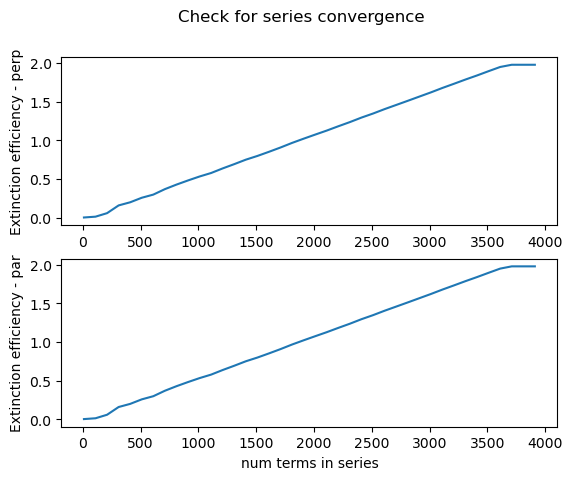

In [6]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Check for series convergence')
ax1.plot(n_terms, ext_efficiencies_perp)
ax2.plot(n_terms, ext_efficiencies_par)

plt.xlabel("num terms in series")
ax1.set_ylabel("Extinction efficiency - perp")
ax2.set_ylabel("Extinction efficiency - par")
plt.show()

Yes, we can see that the series do converge, so we can truncate the series with a finite number of terms (which depends on the size of the line.)

From looking at the graphs generated from each line size, here are the number of terms we should keep to be safe:

In [7]:
NUM_SERIES_TERMS_PER_LINE_STRENGTH = {6: 2000, 8: 2500 ,15: 3500, 25: 3900}

## Line visibility
Now let's study extinction efficiency (a proxy for line visibility)  for clear fishing line, of various tensile strengths,
as we vary the index of refraction. Plot specifically fluorocarbon and nylon line.

### Caution:
The results will have  high-frequency oscillations which may not be noticeable in real world conditions with white light

In [8]:

def graph_extinction_efficiency(line_strength_lbs):
  radius_m = compute_line_radius_m(line_strength_lb)
  x = compute_x(radius_m, WAVELENGTH_M)
  num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]
  
  
  n_vals = np.linspace(N_WATER, N_NYLON_MAX, 100)
  ext_efficiencies_per_n = []
  
  for index_refraction in tqdm(n_vals):
    ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
    ext_efficiencies_per_n.append(ext_efficiency_unpolarized)
  
  
  Q_fluoro = compute_extinction_efficiency_unpolarized(N_WATER, N_FLUORO, x, num_terms)
  Q_nylon_max = compute_extinction_efficiency_unpolarized(N_WATER, N_NYLON_MAX, x, num_terms)
  Q_nylon_min = compute_extinction_efficiency_unpolarized(N_WATER, N_NYLON_MIN, x, num_terms)

  pct_diff_max = (Q_nylon_max - Q_fluoro)/Q_fluoro * 100.0
  pct_diff_min = (Q_nylon_min - Q_fluoro)/Q_fluoro * 100.0

  plt.plot(n_vals, ext_efficiencies_per_n, label="Line with variable index of refraction")
  plt.plot(N_NYLON_MIN, Q_nylon_min, 'ro', label="Mono - min n")
  plt.plot(N_NYLON_MAX, Q_nylon_max, 'go', label="Mono - max n")
  plt.plot(N_FLUORO, Q_fluoro, 'bo', label="Fluorocarbon")
  plt.legend()
  plt.title(f"Extinction efficiency for unpolarized light, {line_strength_lb} lb line ")
  plt.ylabel("Extinction efficiency")
  plt.xlabel("index of refraction")

  return Q_fluoro, Q_nylon_max, Q_nylon_min, pct_diff_max, pct_diff_min



  0%|          | 0/100 [00:00<?, ?it/s]

(2.15183008946832,
 1.9395739668321303,
 2.1055535812646684,
 -9.863981532511922,
 -2.1505651598675213)

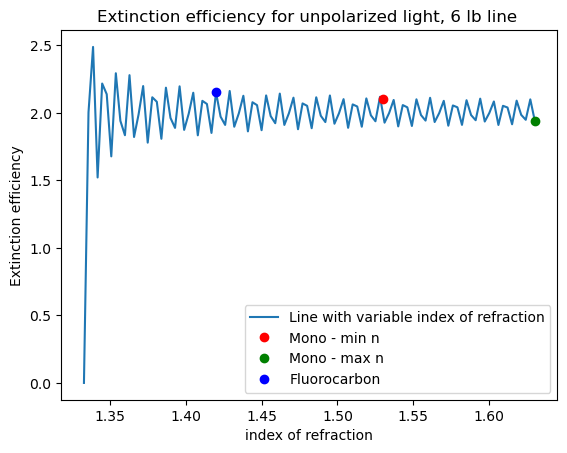

In [9]:
line_strength_lb = 6  #6,8,15,25 

graph_extinction_efficiency(line_strength_lb)

### Observations
* Clearly there are high-frequency oscillations in extinction coefficients, though this graph lacks the resolution to understand their full dynamics
* The model does not predict that fluorocarbon is significantly less visible than nylon (i.e., has lower extinction coefficients).
* It appears the **index of refraction of fishing line would need to be much more similar to that of fresh water (1.333) for the extinction coefficient to be small and the line to be invisible under water**.


  0%|          | 0/100 [00:00<?, ?it/s]

(1.9271433501628095,
 1.9262027983244159,
 1.9525991338176727,
 -0.04880549432475423,
 1.3209076352681635)

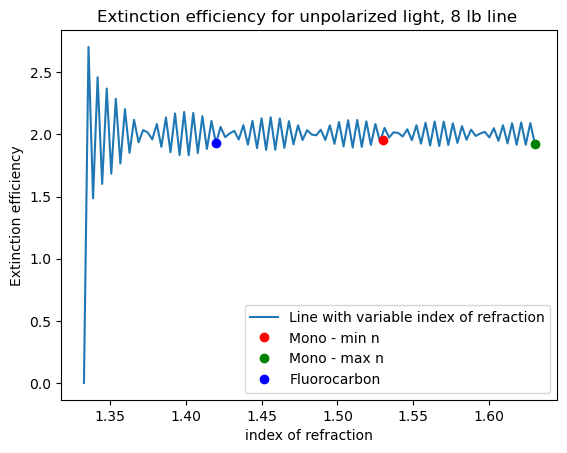

In [10]:
line_strength_lb = 8  #6,8,15,25 

graph_extinction_efficiency(line_strength_lb)

Cool - that looks like [beats](https://en.wikipedia.org/wiki/Beat_(acoustics)). Probably some interaction between the frequency of the sampling (of the plot's evenly-spaced samples) and the high frequency oscillations in extinction.

  0%|          | 0/100 [00:00<?, ?it/s]

(1.8721565238130435,
 1.9370403840668573,
 1.9142080713571412,
 3.465728395490353,
 2.2461555435787384)

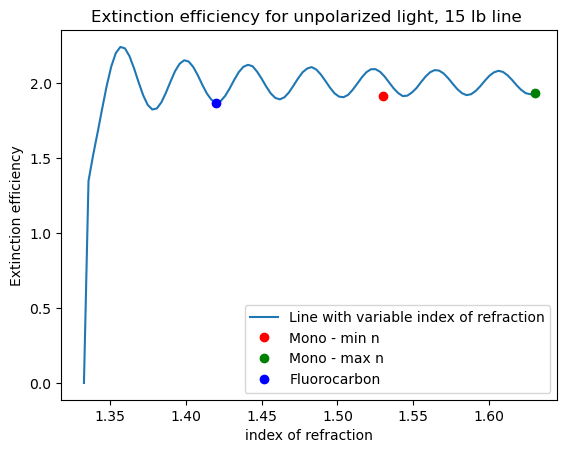

In [11]:
line_strength_lb = 15  #6,8,15,25 

graph_extinction_efficiency(line_strength_lb)

#### Observation: 
the red dot  doesn't lie on the blue line. That's because the extinction coefficient oscillates very rapidly as the index of refraction changes, and the red dot lies at a different value than the values used to plot the line.

#### Zoom in very close around the red dot to confirm that extinction oscillates at high frequency

In [30]:
line_strength_lb = 15
radius_m = compute_line_radius_m(line_strength_lb)
x = compute_x(radius_m, WAVELENGTH_M)
num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]

n_vals = np.linspace(N_NYLON_MIN - 0.01, N_NYLON_MIN + 0.01, 200)
ext_efficiencies_per_n = []

for index_refraction in tqdm(n_vals):
  ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
  ext_efficiencies_per_n.append(ext_efficiency_unpolarized)

  0%|          | 0/200 [00:00<?, ?it/s]

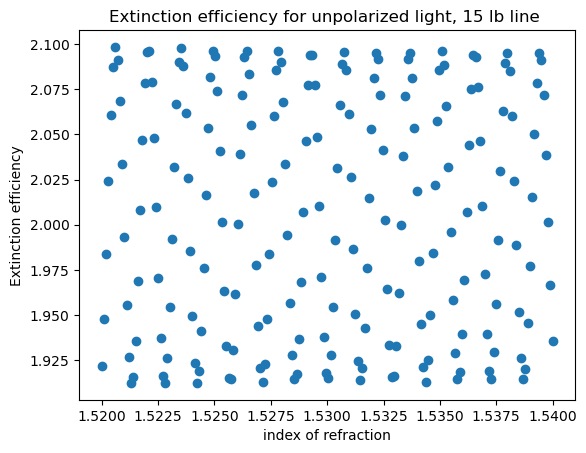

In [31]:
plt.figure()
plt.scatter(n_vals, ext_efficiencies_per_n, label="Line index of refraction")
plt.title(f"Extinction efficiency for unpolarized light, {line_strength_lb} lb line ")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")
plt.show()

Confirmed: the graph oscillates with high frequency, as suspected.  But why?  We'll investigate that more later in this notebook...

  0%|          | 0/100 [00:00<?, ?it/s]

(1.967302913587396,
 1.9434866710858338,
 1.9776991605850283,
 -1.2106037325046743,
 0.5284517664173302)

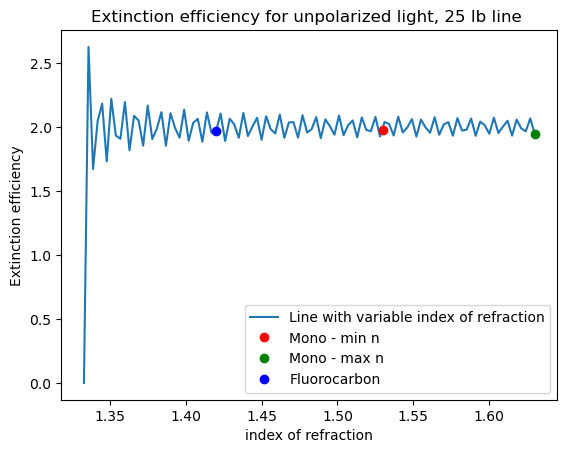

In [14]:
line_strength_lb = 25  #6,8,15,25 

graph_extinction_efficiency(line_strength_lb)

#### Conclusion
The model does not predict that fluorocarbon is significantly less visible under water than nylon.

## When would fluorocarbon actually be invisible?

Recall that fluorocarbon is said to be "invisible" under water, since its index of refraction of 1.42 is close to water (1.333), but our graphs showed fluorocarbon is just as visible as nylon.

What index of refraction would be needed for fluorocarbon to be truly invisible, according to the model?  Let's zoom in and see.

In [68]:
line_strength_lb = 8
radius_m = compute_line_radius_m(line_strength_lb)
x = compute_x(radius_m, WAVELENGTH_M)
num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]

n_vals = np.linspace(1.333, 1.335, 200)
ext_efficiencies_per_n = []

for index_refraction in tqdm(n_vals):
  ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
  ext_efficiencies_per_n.append(ext_efficiency_unpolarized)

  0%|          | 0/200 [00:00<?, ?it/s]

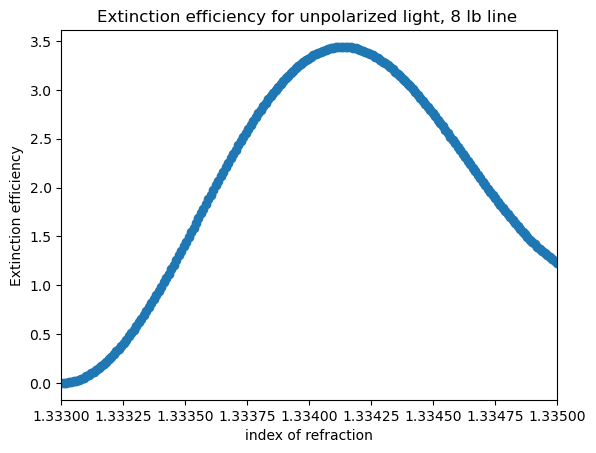

In [69]:
plt.figure()
plt.scatter(n_vals, ext_efficiencies_per_n, label="Line index of refraction")
plt.title(f"Extinction efficiency for unpolarized light, {line_strength_lb} lb line ")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")
plt.xlim(1.333, 1.335)
plt.show()

For fluorocarbon to be significantly less visible in water, it would need an index of refraction extremely similar to water's 1.333, e.g. < 1.3335 for 8lb line.  Its actual index of refraction of 1.42 is far too different from that of fresh water to be invisible, according to this model.


### Invisibility criteria
As an interesting note, Thomson proposed [(slide 17)](https://www.slideserve.com/lesley/mathematical-theory-of-fishing-line-visibility) a criteria for invisibility of fishing line:
$$
(m_t / m - 1)\frac{2R}{\lambda} < 1
$$

This can be rewritten as
$$
m_t < m\left(1 + \frac{\lambda}{2R} \right)
$$

We can compute his result below. We see the value (1.3356) is a bit too large compared to the value we proposed from our graph above (1.3335), i.e. Thomson's constraint is a bit loose, but it is in the right ballpark.  So Thomson's formula seems useful to estimate how similar the index of refraction of line must be to water for low visibility. In short, line's index of refraction must be very similar to water for low visibility/invisibility. Fluorocarbon's (1.42) is not close enough.

In [70]:
mt_invisible_max = N_WATER*(1 + WAVELENGTH_M/(2*radius_m))
print(mt_invisible_max)

1.3356183928571428


## Modeling high-frequency oscillations of  extinction coefficients

In prior graphs, we observed rapid oscillation in the extinction coefficient of monochromatic 
light scattered off of a cylinder as the index of refraction of line changes by tiny amounts.  That raises some concerns about robustness/reliability of the results. How can we understand those oscillations?

To make progress, I study a simpler model: how light behaves when it strikes planar films.

### Thin films

Recall the model of a thin film in optics.  (See [wikipedia article](https://en.wikipedia.org/wiki/Thin-film_interference#Soap_bubble) for details).

If light is normally incident on a thin film with index of refraction $m_t$, of thickness $L$, then we get:
* constructive interference in reflected light, i.e. strong reflection and a large extinction coefficient, when (for integer $k$)  
    $$m_t = (k - 1/2)\left( \frac{\lambda }{2L}\right)$$
* destructive interference in reflected light, i.e. weak reflection and a small extinction coefficient, when
    $$m_t = (k)\left( \frac{\lambda }{2L}\right)$$

That suggests the period of oscillation (as $m_t$ changes) is about
$$
 T_{m_t} \approx \frac{\lambda}{L} 
$$


### Thick Films
Consider a thick film with a thickness $L = .25mm$ that matches the diameter of 6lb fishing line, and plug in $\lambda = 550 nm$ for the wavelength of light. We would find that the extinction coefficient of the thick film would oscillate when the index of refraction changes, with a period of
$$ T_{m_t} \approx 0.0002$$

Compared to the index of refraction of fluorocarbon 1.42, that is an extremely high-frequency oscillation in the extinction coefficient over very tiny changes in the index of refraction!!

Interpretation: why do the oscillations occur in the thick film at such high frequencies?  
* The optical path length of reflected light inside a film is $2 L m_t$, which depends on the index of refraction $m_t$. 
* Given the very large thickness $L$ multiplying $m_t$ in the path length formula $2L m_t$, **only minuscule changes in $m_t$** are required to change the path length by a full wavelength of light (which causes constructive and destructive interference of light reflected inside the film to cycle through a full period.)

### Cylinder

We found for a thick film, the extinction coefficient should have a high-frequency oscillation as the index of refraction changes, due to changing constructive/destructive intererence of light reflected inside the film, with a period
$$
 T_{m_t} \approx \frac{\lambda}{L} 
$$

It seems likely the same effect of light reflecting inside the cylinder could be responsible for the rapid oscillation of its extinction coefficients.
We haven't derived a similar formula for the oscillation period for a cylinder, but from dimensional analysis, the formula must be very similar to this, where $L = 2R$ for radius R.  As we'll see below, this formula works very well in practice for the cylinder. 

### Real world 

Is this type of high-frequency oscillation / interference observed in real world thick films, or cylinders?
  * Generally no.

Why?
* In the real world, light is usually comprised of many wavelengths (e.g. white light) and not perfectly coherent.
  * One [Quora answer](https://www.quora.com/Why-dont-we-see-interference-in-thick-films) says that white light in the real world has a coherence length of about 1 micrometer.  Over path lengths greater than this (such as over a thick fishing line), light loses its coherence and the oscillations average out. So we would not see the high-frequency oscillations.

Hence, I believe to get physically realistic results, we should average out the high-frequency oscillations.
One way would be to average over wavelengths of light, as suggested by Thomson ([slide 15](https://www.slideserve.com/lesley/mathematical-theory-of-fishing-line-visibility)). However, I think the simplest option would be to average over the index of refraction in a narrow region around the value of interest over a few oscillation cycles.


## Verifying the scale of oscillations

Based on the thin film model, and dimensional analysis, we postulated high-frequency oscillations in extinction coefficients of a cylinder (as the index of refraction $m_t$ of the cylinder changes) should occur with a period of
$$
 T_m \approx \frac{\lambda}{L} = \frac{\lambda}{2R}
$$
for line with radius R.

So zoom in on scales comparable to this value and see if this formula accurately describes the period of high-frequency oscillations

In [17]:
line_strength_lb = 6
radius_m = compute_line_radius_m(line_strength_lb)
x = compute_x(radius_m, WAVELENGTH_M)
num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]

delta_n = WAVELENGTH_M/(2 * radius_m)

#Plot 4 periods
n_vals = np.linspace(N_NYLON_MIN - 2*delta_n, N_NYLON_MIN + 2*delta_n, 200)
ext_efficiencies_per_n = []

for index_refraction in tqdm(n_vals):
  ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
  ext_efficiencies_per_n.append(ext_efficiency_unpolarized)

  0%|          | 0/200 [00:00<?, ?it/s]

Text(0.5, 0, 'index of refraction')

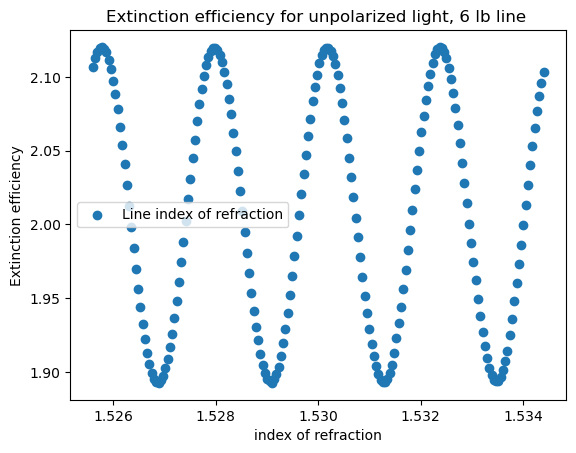

In [18]:
plt.scatter(n_vals, ext_efficiencies_per_n, label="Line index of refraction")

plt.legend()
plt.title(f"Extinction efficiency for unpolarized light, {line_strength_lb} lb line ")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")


####  Result: 
The thin film formula appears to have worked very well at estimating the period of the high-frequency oscillations in the extinction coefficient of a cylinder: we see about 4 periods of oscillation, just as specified  by the formula when creating the graph.  


Using this formula, we can average over the oscillations and compute accurate estimates of the extinction coefficients of popular fishing line materials, representative of the real world where the oscillations are not visible.

## Compute extinction efficiencies with high-frequency oscillations averaged out

We'll compute the mean extinction coefficient averaged over 4 cyles of oscillation, centered
on the true index of refraction of the material. This should give us a value more consistent with real world conditions (white light, short coherence lengths), where oscillations average out.

#### Fluorocarbon first

In [19]:
line_strengths_lbs = sorted(LINE_STRENGTH_LBS_TO_DIAMETER_MM.keys())

#4 PERIODS
n_vals_per_lb = {}


ext_efficiencies_per_n_per_lb = {}

for line_strength_lb in tqdm(line_strengths_lbs):  
  radius_m = compute_line_radius_m(line_strength_lb)
  x = compute_x(radius_m, WAVELENGTH_M)
  num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]
  
  delta_n = WAVELENGTH_M/(2 * radius_m)
  n_vals = np.linspace(N_FLUORO - 2*delta_n, N_FLUORO + 2*delta_n, 200)
  n_vals_per_lb[line_strength_lb] = n_vals
  
  ext_efficiencies_per_n_per_lb[line_strength_lb] = []
  
  for index_refraction in tqdm(n_vals):
    ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
    ext_efficiencies_per_n_per_lb[line_strength_lb].append(ext_efficiency_unpolarized)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

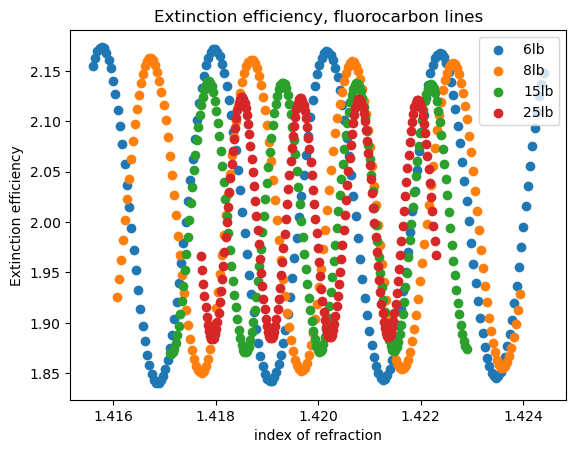

In [44]:
plt.figure()

mean_extinction_fluorocarbon = {}

for line_strength_lb in line_strengths_lbs:
  mean_extinction_fluorocarbon[line_strength_lb] = np.array(ext_efficiencies_per_n_per_lb[line_strength_lb]).mean()
  n_vals = n_vals_per_lb[line_strength_lb]
  plt.scatter(n_vals, ext_efficiencies_per_n_per_lb[line_strength_lb], label=f"{line_strength_lb}lb")

plt.legend()
plt.title(f"Extinction efficiency, fluorocarbon lines")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")

plt.show()

In [46]:
mean_extinction_fluorocarbon

{6: 2.007391972407604,
 8: 2.0058707934750917,
 15: 2.004243606778542,
 25: 2.0039235937227833}

#### Nylon with low index of refraction value

In [47]:
#4 PERIODS
n_vals_per_lb = {}

ext_efficiencies_per_n_per_lb = {}

for line_strength_lb in tqdm(line_strengths_lbs):  
  radius_m = compute_line_radius_m(line_strength_lb)
  x = compute_x(radius_m, WAVELENGTH_M)
  num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]
  
  delta_n = WAVELENGTH_M/(2 * radius_m)
  n_vals = np.linspace(N_NYLON_MIN - 2*delta_n, N_NYLON_MIN + 2*delta_n, 200)
  n_vals_per_lb[line_strength_lb] = n_vals
  
  ext_efficiencies_per_n_per_lb[line_strength_lb] = []
  
  for index_refraction in tqdm(n_vals):
    ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
    ext_efficiencies_per_n_per_lb[line_strength_lb].append(ext_efficiency_unpolarized)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

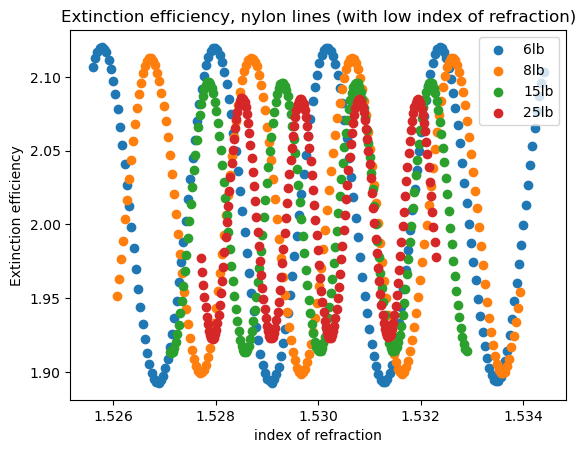

In [50]:
plt.figure()

mean_extinction_nylon_min = {}

for line_strength_lb in line_strengths_lbs:
  mean_extinction_nylon_min[line_strength_lb] = np.array(ext_efficiencies_per_n_per_lb[line_strength_lb]).mean()
  n_vals = n_vals_per_lb[line_strength_lb]
  plt.scatter(n_vals, ext_efficiencies_per_n_per_lb[line_strength_lb], label=f"{line_strength_lb}lb")

plt.legend()
plt.title(f"Extinction efficiency, nylon lines (with low index of refraction)")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")

plt.show()

In [51]:
mean_extinction_nylon_min

{6: 2.0070098903006963,
 8: 2.0058149693830654,
 15: 2.0044408891622285,
 25: 2.004042222141903}

#### Nylon with high index of refraction value

In [56]:
#4 PERIODS
n_vals_per_lb = {}

ext_efficiencies_per_n_per_lb = {}

for line_strength_lb in tqdm(line_strengths_lbs):  
  radius_m = compute_line_radius_m(line_strength_lb)
  x = compute_x(radius_m, WAVELENGTH_M)
  num_terms = NUM_SERIES_TERMS_PER_LINE_STRENGTH[line_strength_lb]
  
  delta_n = WAVELENGTH_M/(2 * radius_m)
  n_vals = np.linspace(N_NYLON_MAX - 2*delta_n, N_NYLON_MAX + 2*delta_n, 200)
  n_vals_per_lb[line_strength_lb] = n_vals
  
  ext_efficiencies_per_n_per_lb[line_strength_lb] = []
  
  for index_refraction in tqdm(n_vals):
    ext_efficiency_unpolarized = compute_extinction_efficiency_unpolarized(N_WATER, index_refraction, x, num_terms)
    ext_efficiencies_per_n_per_lb[line_strength_lb].append(ext_efficiency_unpolarized)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

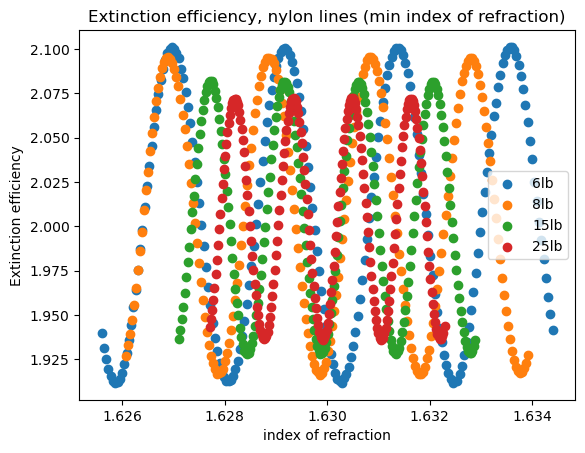

In [58]:
plt.figure()

mean_extinction_nylon_max = {}

for line_strength_lb in line_strengths_lbs:
  mean_extinction_nylon_max[line_strength_lb] = np.array(ext_efficiencies_per_n_per_lb[line_strength_lb]).mean()
  n_vals = n_vals_per_lb[line_strength_lb]
  plt.scatter(n_vals, ext_efficiencies_per_n_per_lb[line_strength_lb], label=f"{line_strength_lb}lb")

plt.legend()
plt.title(f"Extinction efficiency, nylon lines (min index of refraction)")
plt.ylabel("Extinction efficiency")
plt.xlabel("index of refraction")

plt.show()

In [59]:
mean_extinction_nylon_max

{6: 2.006127335210352,
 8: 2.0056681964856806,
 15: 2.0045997538946607,
 25: 2.003925812008607}

### Visibility comparison
Finally, let's plot the percent difference (nylon vs fluorocarbon) in the extinction coefficients -- our measure of visibility -- after we have averaged out the high frequency oscillations.  Let's compute it for nylon with low and high values of index of refraction.

In [62]:
ext_pct_diff_max = {}
ext_pct_diff_min = {}


print("percent difference in visibility (extinction coeffient), nylon vs fluorocarbon, is:\n")

for line_strength_lb in line_strengths_lbs:
  ext_pct_diff_max[line_strength_lb] = (mean_extinction_nylon_max[line_strength_lb] - mean_extinction_fluorocarbon[line_strength_lb])/mean_extinction_fluorocarbon[line_strength_lb] * 100.0
  ext_pct_diff_min[line_strength_lb] = (mean_extinction_nylon_min[line_strength_lb] - mean_extinction_fluorocarbon[line_strength_lb])/mean_extinction_fluorocarbon[line_strength_lb] * 100.0

  print(f"{line_strength_lb}lb line: ")
  print(f"  mono with low index of refraction vs fluoro: {ext_pct_diff_min[line_strength_lb]:.2f}%")
  print(f"  mono with high index of refraction vs fluoro: {ext_pct_diff_max[line_strength_lb]:.2f}\n")

percent difference in visibility (extinction coeffient), nylon vs fluorocarbon, is:

6lb line: 
  mono with low index of refraction vs fluoro: -0.02%
  mono with high index of refraction vs fluoro: -0.06

8lb line: 
  mono with low index of refraction vs fluoro: -0.00%
  mono with high index of refraction vs fluoro: -0.01

15lb line: 
  mono with low index of refraction vs fluoro: 0.01%
  mono with high index of refraction vs fluoro: 0.02

25lb line: 
  mono with low index of refraction vs fluoro: 0.01%
  mono with high index of refraction vs fluoro: 0.00



#### Conclusion:
There is no significant difference in the visibility of nylon and fluorocarbon, according to this model.  This model predicts the index of refraction of fluorocarbon would need to be much closer to that of water to make fluorocarbon significantly less visible than nylon of the same diameter, when submerged in fresh water.

These are the same conclusions Thomson reached in his [analysis](https://www.slideserve.com/lesley/mathematical-theory-of-fishing-line-visibility).

##### Caveats:
Other subtle factors can influence line visibility, like:
* Tint: some lines are clear, while others have subtle, or not subtle, color tins. Tints definitely increase visibility of line compared to clear line -- tints increase extinction.
* Diameter: there is a great variability in the diameters (and breaking strengths) of lines marketed at a given strength label, e.g. 8lb line. Thinner lines are less visible in general. Some of the most popular fluorocarbon lines have thinner than average diameters compared to comparable nylon lines at a given strength label, e.g. 6lb line. (Those thinner diameters are often accompanied by lower breaking strengths, since diameter and strength are correlated.)  Hence, if one swaps 6lb nylon for 6lb fluorocarbon, one might inadvertently change to a thinner (and weaker) line with lower visibility, which has nothing to do with the index of refraction.  That's why this analysis focused on lines with the same diameter.